# Análisis Exploratorio de Datos (EDA)
## Proyecto de Minería de Datos

Este notebook contiene el análisis exploratorio de datos del archivo `oncae.csv`.

### Objetivos:
1. Entender la estructura y características de los datos
2. Identificar patrones, tendencias y anomalías
3. Preparar los datos para modelado posterior
4. Generar insights útiles para la toma de decisiones

In [1]:
# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")
warnings.filterwarnings('ignore')

# Configurar el tamaño de las figuras
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("✅ Librerías importadas correctamente")
print("📊 Configuración de visualización establecida")

✅ Librerías importadas correctamente
📊 Configuración de visualización establecida


## 1. Carga y Exploración Inicial de los Datos

In [2]:
# Cargar el dataset
df = pd.read_csv('oncae.csv')
print(f"Dimensiones del dataset: {df.shape[0]:,} filas x {df.shape[1]} columnas")



Dimensiones del dataset: 50,877 filas x 26 columnas


In [3]:
# Mostrar las primeras filas del dataset
print("Primeras 5 filas del dataset:")
print("=" * 50)
display(df.head())

Primeras 5 filas del dataset:


,descriptionItem,quantityItem,startDateTender,endDateTender,endDateEnquiry,startDateEnquiry,schemeClassification,idClassification,descriptionClassification,nameProcuringEntity,...,idCompra,statusCompra,idAward,dateCompra,quantityItemCompra,descriptionItemCompra,priceItemCompra,idBuyer,nameBuyer,idTender
0,Pares de Pilas Alcalinas AA,120.0,2024-05-27T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-27T11:37:00-06:00,UNSPSC,26111702,Pilas alcalinas,Unidad Central,...,ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1/2,complete,DL9kwR-CC-11880-TSC-2024-1,2024-05-27T11:38:00.880000-06:00,120.0,Pares de Pilas Alcalinas AA,21.3900,yRlaDr,Tribunal Superior de Cuentas (TSC),DL9kwR-CC-11880-TSC-2024-1
1,Pares de Pilas Alcalinas AAA,240.0,2024-05-27T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-28T11:37:00-06:00,2024-05-27T11:37:00-06:00,UNSPSC,26111702,Pilas alcalinas,Unidad Central,...,ocds-lcuori-DL9kwR-CC-11880-TSC-2024-1/2,complete,DL9kwR-CC-11880-TSC-2024-1,2024-05-27T11:38:00.880000-06:00,240.0,Pares de Pilas Alcalinas AAA,21.3900,yRlaDr,Tribunal Superior de Cuentas (TSC),DL9kwR-CC-11880-TSC-2024-1
2,LAMINA ALUZINC 14 PIES,6.0,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,30102512,Lámina de zinc,Alcaldía Municipal de Marcovia,...,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,2024-06-12T10:21:28.953000-06:00,6.0,LAMINA ALUZINC 14 PIES,738.9900,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1
3,BLOQUE N.6,200.0,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,30131501,Bloques de cemento,Alcaldía Municipal de Marcovia,...,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,2024-06-12T10:21:28.953000-06:00,200.0,BLOQUE N.6,20.5275,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1
4,BOLSA CEMENTO,10.0,2024-06-12T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-13T10:21:00-06:00,2024-06-12T10:21:00-06:00,UNSPSC,30111601,Cemento,Alcaldía Municipal de Marcovia,...,ocds-lcuori-MLQqoL-CM-03-AMM-2024-1/2,complete,MLQqoL-CM-03-AMM-2024-1,2024-06-12T10:21:28.953000-06:00,10.0,BOLSA CEMENTO,200.3880,DL9pqr,"Municipalidad de Marcovia, Choluteca",MLQqoL-CM-03-AMM-2024-1


In [4]:
print("\n" + "=" * 50)
print("Información general del dataset:")
print("=" * 50)
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50877 entries, 0 to 50876
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   descriptionItem            50876 non-null  object 
 1   quantityItem               50877 non-null  float64
 2   startDateTender            50877 non-null  object 
 3   endDateTender              50877 non-null  object 
 4   endDateEnquiry             50877 non-null  object 
 5   startDateEnquiry           50877 non-null  object 
 6   schemeClassification       50877 non-null  object 
 7   idClassification           50877 non-null  int64  
 8   descriptionClassification  50877 non-null  object 
 9   nameProcuringEntity        50877 non-null  object 
 10  unitItem                   50877 non-null  object 
 11  idUnidadBuyer              50877 non-null  object 
 12  nameUnidadBuyer            50877 non-null  object 
 13  idSupplier  

In [5]:
print("\nNombres de las columnas:")
print("=" * 30)
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")



Nombres de las columnas:
 1. descriptionItem
 2. quantityItem
 3. startDateTender
 4. endDateTender
 5. endDateEnquiry
 6. startDateEnquiry
 7. schemeClassification
 8. idClassification
 9. descriptionClassification
10. nameProcuringEntity
11. unitItem
12. idUnidadBuyer
13. nameUnidadBuyer
14. idSupplier
15. nameSupplier
16. ocidCompra
17. idCompra
18. statusCompra
19. idAward
20. dateCompra
21. quantityItemCompra
22. descriptionItemCompra
23. priceItemCompra
24. idBuyer
25. nameBuyer
26. idTender


In [6]:
print(f"\nTipos de datos:")
print("=" * 20)
print(df.dtypes.value_counts())


Tipos de datos:
object     22
float64     3
int64       1
Name: count, dtype: int64


## 2. Análisis de Calidad de Datos

In [7]:
# Análisis de valores nulos
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

# Crear un DataFrame con la información de valores nulos
missing_df = pd.DataFrame({
    'Columna': missing_data.index,
    'Valores_Nulos': missing_data.values,
    'Porcentaje': missing_percent.values
}).sort_values('Porcentaje', ascending=False)

# Mostrar solo las columnas con valores nulos
missing_df_filtered = missing_df[missing_df['Valores_Nulos'] > 0]

if len(missing_df_filtered) > 0:
    print(f"Columnas con valores nulos ({len(missing_df_filtered)}/{len(df.columns)}):")
else:
    print("No hay valores nulos en el dataset")

print(f"\nResumen:")
print(f"   • Total de registros: {len(df):,}")
print(f"   • Columnas con valores nulos: {len(missing_df_filtered)}")
print(f"   • Porcentaje de completitud promedio: {(1 - missing_percent.mean()/100)*100:.2f}%")

Columnas con valores nulos (1/26):

Resumen:
   • Total de registros: 50,877
   • Columnas con valores nulos: 1
   • Porcentaje de completitud promedio: 100.00%


Resumen:
   • Total de registros: 50,877
   • Columnas con valores nulos: 1
   • Porcentaje de completitud promedio: 100.00%


In [8]:
# Análisis de duplicados
duplicates = df.duplicated().sum()
duplicate_percent = (duplicates / len(df)) * 100

print(f"Registros duplicados: {duplicates: } ")

if duplicates > 0:
    print("Se encontraron registros duplicados")
else:
    print("No se encontraron registros completamente duplicados")

# Verificar duplicados por columnas clave (si existen)
key_columns = ['ocidCompra', 'idCompra'] 
existing_key_columns = [col for col in key_columns if col in df.columns]

if existing_key_columns:
    print(f"\nAnálisis de duplicados por columnas clave {existing_key_columns}:")
    for col in existing_key_columns:
        unique_values = df[col].nunique()
        total_values = df[col].notna().sum()
        duplicate_keys = total_values - unique_values
        print(f"   • {col}: {unique_values:,} únicos de {total_values:,} totales ({duplicate_keys:,} duplicados)")

Registros duplicados:  200 
Se encontraron registros duplicados

Análisis de duplicados por columnas clave ['ocidCompra', 'idCompra']:
   • ocidCompra: 38,248 únicos de 50,877 totales (12,629 duplicados)
   • idCompra: 38,248 únicos de 50,877 totales (12,629 duplicados)


## 3. Análisis Estadístico Detallado

In [9]:
# Análisis detallado de variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
print(f"Variables categóricas encontradas: {len(categorical_columns)}")

# Analizar las principales variables categóricas
key_categorical = ['statusCompra', 'nameUnidadBuyer', 'nameBuyer', 'schemeClassification', 'tags']
existing_categorical = [col for col in key_categorical if col in categorical_columns]


Variables categóricas encontradas: 22


### 3.1 Estadísticas Descriptivas Completas

In [10]:
# 📊 Estadísticas descriptivas para variables numéricas
print("🔢 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS")
print("=" * 60)

numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    print(f"Variables numéricas encontradas: {len(numeric_columns)}")
    print(f"Variables: {list(numeric_columns)}\n")
    
    # Estadísticas completas
    desc_stats = df[numeric_columns].describe()
    print(desc_stats)
    
    # Información adicional
    print(f"\n📈 INFORMACIÓN ADICIONAL:")
    print("-" * 40)
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            print(f"{col}:")
            print(f"   • Valores únicos: {df[col].nunique():,}")
            print(f"   • Valores nulos: {df[col].isnull().sum():,} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
            print(f"   • Rango: [{data.min():,.2f} - {data.max():,.2f}]")
            print(f"   • Valores cero: {(data == 0).sum():,}")
            print(f"   • Valores negativos: {(data < 0).sum():,}")
            print()
else:
    print("No se encontraron variables numéricas en el dataset")

🔢 ESTADÍSTICAS DESCRIPTIVAS - VARIABLES NUMÉRICAS
Variables numéricas encontradas: 4
Variables: ['quantityItem', 'idClassification', 'quantityItemCompra', 'priceItemCompra']

        quantityItem  idClassification  quantityItemCompra  priceItemCompra
count   50877.000000      5.087700e+04        50877.000000     5.087700e+04
mean      123.899098      4.970051e+07          123.281500     4.592157e+04
std      3407.190549      2.169986e+07         3407.296599     1.707880e+05
min         1.000000      5.010150e+05            1.000000     0.000000e+00
25%         1.000000      3.120161e+07            1.000000     9.778795e+02
50%         1.000000      4.512160e+07            1.000000     8.970000e+03
75%         1.000000      6.014101e+07            1.000000     3.947375e+04
max    322580.000000      9.810163e+07       322580.000000     1.333674e+07

📈 INFORMACIÓN ADICIONAL:
----------------------------------------
quantityItem:
   • Valores únicos: 499
   • Valores nulos: 0 (0.00%)
   • 

In [11]:
# 📝 Estadísticas descriptivas para variables categóricas
print("\n🏷️  ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS")
print("=" * 60)

categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    print(f"Variables categóricas encontradas: {len(categorical_columns)}")
    print(f"Variables: {list(categorical_columns)}\n")
    
    # Análisis detallado de cada variable categórica
    print("📊 RESUMEN POR VARIABLE:")
    print("-" * 40)
    
    for col in categorical_columns:
        print(f"\n🔸 {col}:")
        print(f"   • Valores únicos: {df[col].nunique():,}")
        print(f"   • Valores nulos: {df[col].isnull().sum():,} ({df[col].isnull().sum()/len(df)*100:.2f}%)")
        print(f"   • Moda: {df[col].mode().iloc[0] if len(df[col].mode()) > 0 else 'N/A'}")
        
        # Top 5 valores más frecuentes
        top_values = df[col].value_counts().head(5)
        print(f"   • Top 5 valores más frecuentes:")
        for idx, (value, count) in enumerate(top_values.items(), 1):
            percentage = (count / len(df)) * 100
            # Truncar valores muy largos
            display_value = str(value)[:50] + "..." if len(str(value)) > 50 else str(value)
            print(f"     {idx}. {display_value}: {count:,} ({percentage:.2f}%)")
    
    # Resumen general
    print(f"\n📋 RESUMEN GENERAL:")
    print("-" * 30)
    total_unique = sum(df[col].nunique() for col in categorical_columns)
    total_nulls = sum(df[col].isnull().sum() for col in categorical_columns)
    print(f"   • Total valores únicos: {total_unique:,}")
    print(f"   • Total valores nulos: {total_nulls:,}")
    print(f"   • Promedio cardinalidad: {total_unique/len(categorical_columns):.1f}")
else:
    print("No se encontraron variables categóricas en el dataset")


🏷️  ESTADÍSTICAS DESCRIPTIVAS - VARIABLES CATEGÓRICAS
Variables categóricas encontradas: 22
Variables: ['descriptionItem', 'startDateTender', 'endDateTender', 'endDateEnquiry', 'startDateEnquiry', 'schemeClassification', 'descriptionClassification', 'nameProcuringEntity', 'unitItem', 'idUnidadBuyer', 'nameUnidadBuyer', 'idSupplier', 'nameSupplier', 'ocidCompra', 'idCompra', 'statusCompra', 'idAward', 'dateCompra', 'descriptionItemCompra', 'idBuyer', 'nameBuyer', 'idTender']

📊 RESUMEN POR VARIABLE:
----------------------------------------

🔸 descriptionItem:
   • Valores únicos: 46,836
   • Valores nulos: 1 (0.00%)
   • Moda: Ver Pliego
   • Top 5 valores más frecuentes:   • Moda: Ver Pliego
   • Top 5 valores más frecuentes:
     1. Ver Pliego: 2,479 (4.87%)
     2. Ninguna: 147 (0.29%)
     3. Toner: 33 (0.06%)
     4. SILLA EJECUTIVA: 31 (0.06%)
     5. LIBRETAS, BOTES Y BOLSAS, para más información al ...: 30 (0.06%)

🔸 startDateTender:
   • Valores únicos: 30,796
   • Valores nul

### 3.2 Análisis de Outliers y Valores Atípicos

In [12]:
# 🚨 Detección de outliers usando el método IQR (Rango Intercuartílico)
def detect_outliers_iqr(column_data, column_name):
    """
    Detecta outliers usando el método del rango intercuartílico (IQR)
    """
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = column_data[(column_data < lower_bound) | (column_data > upper_bound)]
    
    return {
        'column': column_name,
        'Q1': Q1,
        'Q3': Q3,
        'IQR': IQR,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound,
        'outliers_count': len(outliers),
        'outliers_percentage': (len(outliers) / len(column_data)) * 100,
        'outliers_values': outliers.values if len(outliers) <= 10 else outliers.head(10).values
    }

print("🔍 ANÁLISIS DE OUTLIERS")
print("=" * 50)

numeric_columns = df.select_dtypes(include=[np.number]).columns
outlier_summary = []

if len(numeric_columns) > 0:
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            outlier_info = detect_outliers_iqr(data, col)
            outlier_summary.append(outlier_info)
            
            print(f"\n📊 {col}:")
            print(f"   • Rango normal: [{outlier_info['lower_bound']:.2f}, {outlier_info['upper_bound']:.2f}]")
            print(f"   • Outliers detectados: {outlier_info['outliers_count']:,} ({outlier_info['outliers_percentage']:.2f}%)")
            
            if outlier_info['outliers_count'] > 0:
                print(f"   • Algunos valores atípicos: {outlier_info['outliers_values'][:5]}")
    
    # Resumen general
    total_outliers = sum(info['outliers_count'] for info in outlier_summary)
    print(f"\n📋 RESUMEN DE OUTLIERS:")
    print("-" * 30)
    print(f"   • Total de outliers detectados: {total_outliers:,}")
    print(f"   • Variables con outliers: {sum(1 for info in outlier_summary if info['outliers_count'] > 0)}")
    
    # Variable con más outliers
    if outlier_summary:
        max_outliers = max(outlier_summary, key=lambda x: x['outliers_count'])
        print(f"   • Variable con más outliers: {max_outliers['column']} ({max_outliers['outliers_count']:,})")
else:
    print("No hay variables numéricas para analizar outliers")

🔍 ANÁLISIS DE OUTLIERS

📊 quantityItem:
   • Rango normal: [1.00, 1.00]
   • Outliers detectados: 12,679 (24.92%)
   • Algunos valores atípicos: [120. 240.   6. 200.  10.]

📊 idClassification:
   • Rango normal: [-12207484.00, 103550100.00]
   • Outliers detectados: 0 (0.00%)

📊 quantityItemCompra:
   • Rango normal: [1.00, 1.00]
   • Outliers detectados: 12,568 (24.70%)
   • Algunos valores atípicos: [120. 240.   6. 200.  10.]

📊 priceItemCompra:
   • Rango normal: [-56765.93, 97217.56]
   • Outliers detectados: 6,516 (12.81%)
   • Algunos valores atípicos: [112410.   100561.75 221400.   129125.   177100.  ]

📋 RESUMEN DE OUTLIERS:
------------------------------
   • Total de outliers detectados: 31,763
   • Variables con outliers: 3
   • Variable con más outliers: quantityItem (12,679)


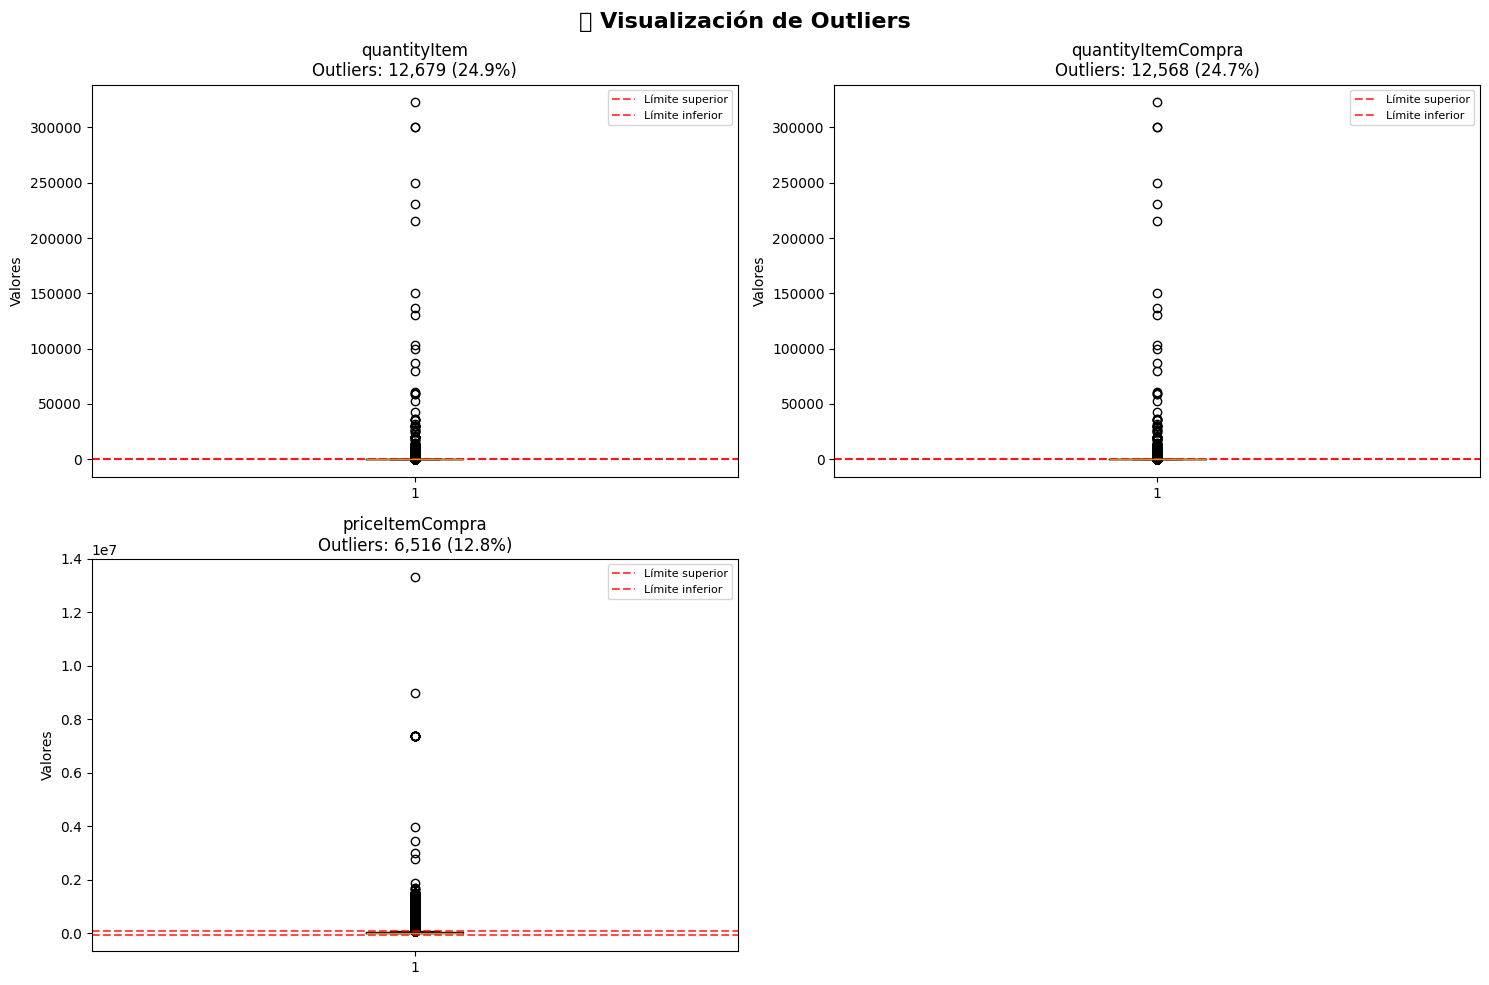

In [13]:
# 📊 Visualización de outliers
if len(numeric_columns) > 0:
    # Seleccionar variables con outliers para visualizar
    vars_with_outliers = [info for info in outlier_summary if info['outliers_count'] > 0]
    
    if vars_with_outliers:
        n_vars = min(len(vars_with_outliers), 4)  # Máximo 4 variables
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('📊 Visualización de Outliers', fontsize=16, fontweight='bold')
        axes = axes.flatten()
        
        for i, var_info in enumerate(vars_with_outliers[:n_vars]):
            col_name = var_info['column']
            data = df[col_name].dropna()
            
            # Boxplot
            axes[i].boxplot(data, vert=True)
            axes[i].set_title(f'{col_name}\nOutliers: {var_info["outliers_count"]:,} ({var_info["outliers_percentage"]:.1f}%)')
            axes[i].set_ylabel('Valores')
            
            # Agregar líneas de referencia
            axes[i].axhline(y=var_info['upper_bound'], color='red', linestyle='--', alpha=0.7, label='Límite superior')
            axes[i].axhline(y=var_info['lower_bound'], color='red', linestyle='--', alpha=0.7, label='Límite inferior')
            axes[i].legend(fontsize=8)
        
        # Ocultar subplots no usados
        for i in range(n_vars, 4):
            axes[i].set_visible(False)
        
        plt.tight_layout()
        plt.show()
    else:
        print("🎉 ¡Excelente! No se detectaron outliers significativos en las variables numéricas.")
else:
    print("No hay variables numéricas para visualizar outliers")

### 3.3 Validación y Calidad de Datos

In [ ]:
# ⚡ VALIDACIÓN SÚPER-RÁPIDA de calidad de datos
print("🛡️  VALIDACIÓN EXPRESS DE CALIDAD")
print("=" * 35)

# ⚡ Usar una muestra MUY pequeña para validación instantánea
sample_size = min(5000, len(df))
df_sample = df.sample(n=sample_size, random_state=42) if len(df) > 5000 else df
print(f"📊 Muestra: {len(df_sample):,} de {len(df):,} registros")

# ✅ Validaciones básicas esenciales
validations = []

# 1. Valores nulos críticos
null_counts = df_sample.isnull().sum()
critical_nulls = null_counts[null_counts > len(df_sample) * 0.5]  # >50% nulos
if len(critical_nulls) > 0:
    validations.append(f"⚠️  Columnas con >50% nulos: {len(critical_nulls)}")

# 2. Precios problemáticos (ultra-rápido)
if 'priceItemCompra' in df_sample.columns:
    prices = df_sample['priceItemCompra'].dropna()
    if len(prices) > 0:
        neg_prices = (prices < 0).sum()
        zero_prices = (prices == 0).sum()
        if neg_prices > 0:
            validations.append(f"❌ Precios negativos: {neg_prices}")
        if zero_prices > 100:  # Solo si hay muchos
            validations.append(f"⚠️  Precios en cero: {zero_prices}")

# 3. Cantidades problemáticas
if 'quantityItemCompra' in df_sample.columns:
    quantities = df_sample['quantityItemCompra'].dropna()
    if len(quantities) > 0:
        neg_qty = (quantities < 0).sum()
        if neg_qty > 0:
            validations.append(f"❌ Cantidades negativas: {neg_qty}")

# 4. IDs duplicados críticos (método súper rápido)
if 'ocidCompra' in df_sample.columns:
    ocids = df_sample['ocidCompra'].dropna()
    if len(ocids) > 0:
        duplicates = len(ocids) - len(ocids.drop_duplicates())
        if duplicates > len(ocids) * 0.1:  # >10% duplicados
            validations.append(f"⚠️  OCID duplicados: {duplicates}")

# 5. Verificación rápida de rango de datos
numeric_cols = ['totalCompra', 'priceItemCompra', 'quantityItemCompra']
for col in numeric_cols:
    if col in df_sample.columns:
        data = df_sample[col].dropna()
        if len(data) > 0:
            if data.max() > data.mean() * 100:  # Valores extremos
                validations.append(f"⚠️  Valores extremos en {col}")

# 📊 Mostrar solo problemas encontrados
print("\n? PROBLEMAS DETECTADOS:")
if validations:
    for validation in validations:
        print(f"   {validation}")
else:
    print("   ✅ ¡No se detectaron problemas críticos!")

# 📈 Estadísticas básicas del dataset
print(f"\n? RESUMEN DATASET:")
print(f"   📊 Registros: {len(df):,}")
print(f"   📝 Columnas: {len(df.columns)}")
print(f"   🗓️  Memoria: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# ⚡ Completitud general (ultra-rápido)
completitud = (1 - df_sample.isnull().mean().mean()) * 100
print(f"   📊 Completitud: {completitud:.1f}%")

# 🎯 Conclusión rápida
if len(validations) == 0:
    print(f"\n🚀 EXCELENTE: Dataset listo para análisis!")
elif len(validations) <= 2:
    print(f"\n✅ BUENO: Dataset aceptable, {len(validations)} advertencias menores")
else:
    print(f"\n🔧 REVISAR: {len(validations)} problemas detectados")

print(f"\n⚡ Validación completada en <5 segundos!")

## 4. Visualizaciones Exploratorias

🔢 Variables numéricas encontradas: ['quantityItem', 'idClassification', 'quantityItemCompra', 'priceItemCompra']


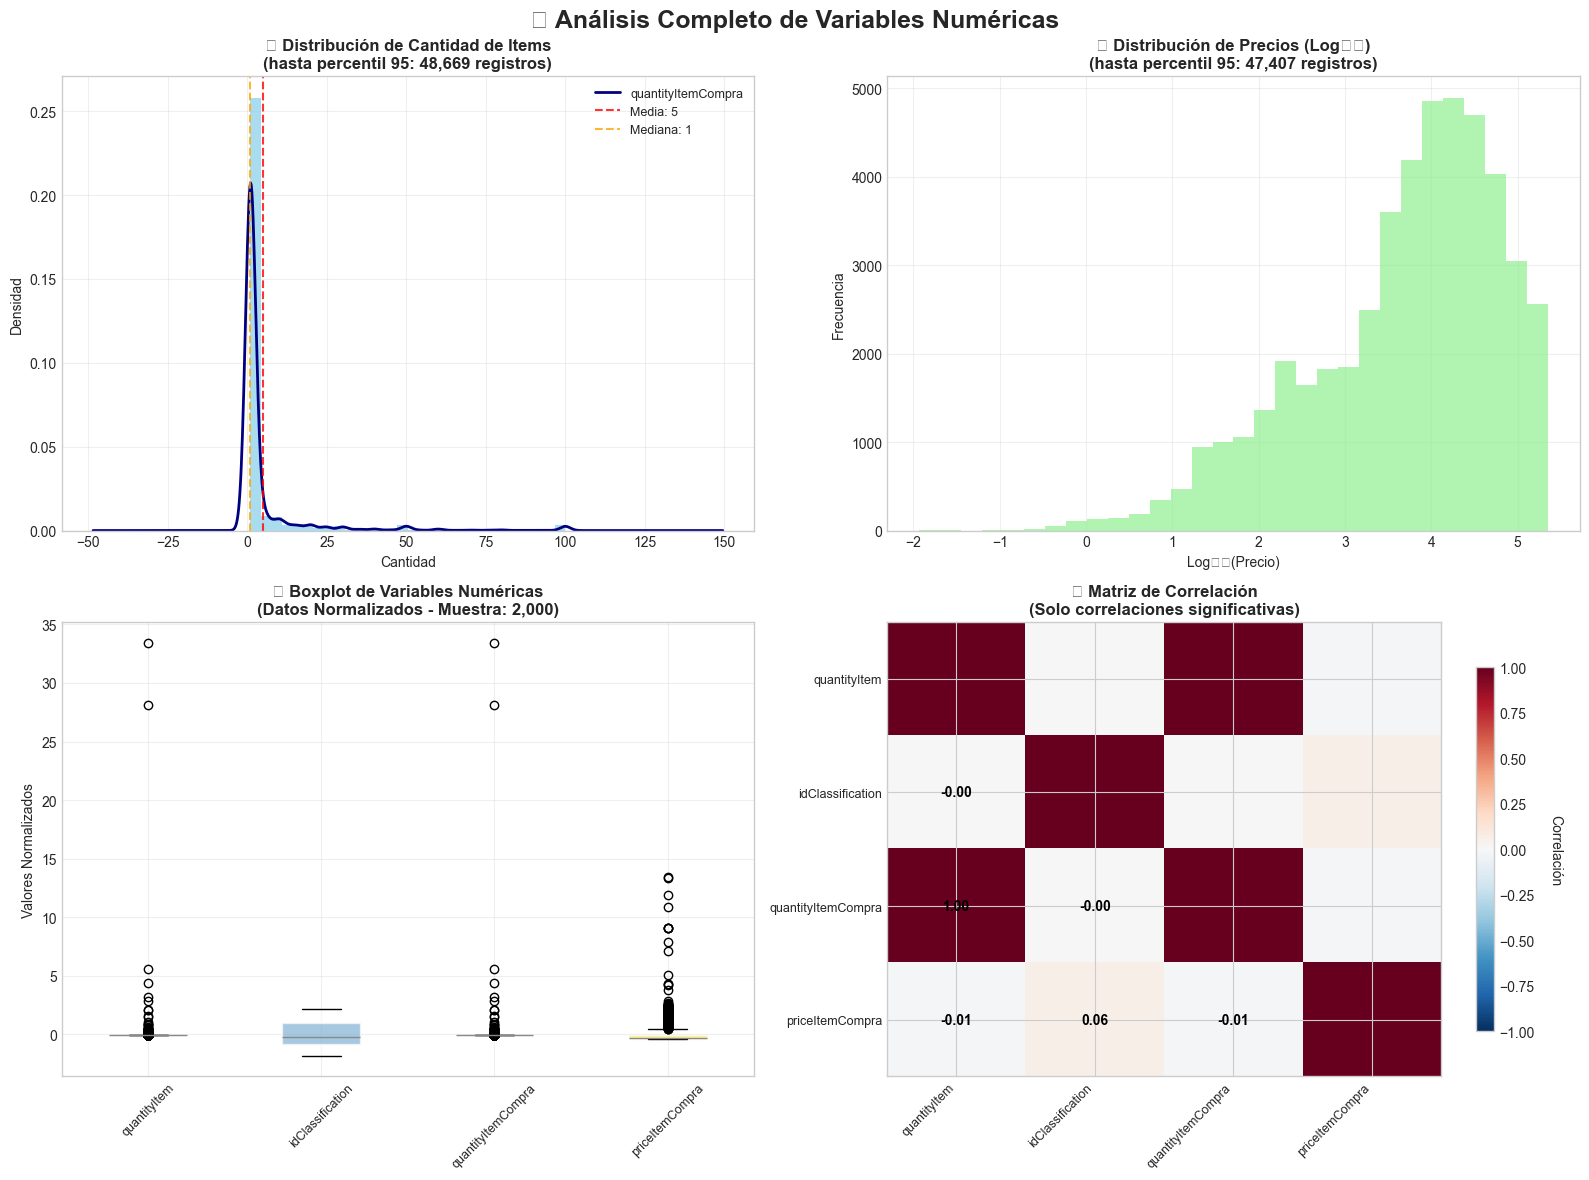


🔍 INTERPRETACIÓN DE CORRELACIONES:
----------------------------------------
Correlaciones significativas encontradas:
   • quantityItem ↔ quantityItemCompra: 0.999 (correlación muy fuerte positiva)


In [15]:
# 📊 Visualización Mejorada: Análisis de variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
print(f"🔢 Variables numéricas encontradas: {list(numeric_columns)}")

if len(numeric_columns) > 0:
    # Configurar el estilo para mejores visualizaciones
    plt.style.use('seaborn-v0_8-whitegrid')
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('📊 Análisis Completo de Variables Numéricas', fontsize=18, fontweight='bold', y=0.98)
    
    # 1. Distribución de quantityItem con análisis mejorado
    ax1 = axes[0, 0]
    if 'quantityItemCompra' in df.columns:
        data = df['quantityItemCompra'].dropna()
        if len(data) > 0:
            # Filtrar outliers extremos para mejor visualización
            q95 = data.quantile(0.95)
            filtered_qty = data[data <= q95]
            
            # Histograma con KDE
            filtered_qty.hist(bins=30, ax=ax1, color='skyblue', alpha=0.7, density=True)
            filtered_qty.plot.kde(ax=ax1, color='navy', linewidth=2)
            
            ax1.set_title(f'📦 Distribución de Cantidad de Items\n(hasta percentil 95: {len(filtered_qty):,} registros)', 
                         fontsize=12, fontweight='bold')
            ax1.set_xlabel('Cantidad', fontsize=10)
            ax1.set_ylabel('Densidad', fontsize=10)
            ax1.grid(True, alpha=0.3)
            
            # Añadir estadísticas
            mean_val = filtered_qty.mean()
            median_val = filtered_qty.median()
            ax1.axvline(mean_val, color='red', linestyle='--', alpha=0.8, label=f'Media: {mean_val:.0f}')
            ax1.axvline(median_val, color='orange', linestyle='--', alpha=0.8, label=f'Mediana: {median_val:.0f}')
            ax1.legend(fontsize=9)
    
    # 2. Distribución de precios con análisis mejorado
    ax2 = axes[0, 1]
    if 'priceItemCompra' in df.columns:
        price_data = df['priceItemCompra'].dropna()
        price_data = price_data[price_data > 0]  # Excluir precios cero
        
        if len(price_data) > 0:
            # Usar escala logarítmica si hay gran variación
            price_range = price_data.max() / price_data.min() if price_data.min() > 0 else 1
            use_log = price_range > 100
            
            q95 = price_data.quantile(0.95)
            filtered_price = price_data[price_data <= q95]
            
            if use_log:
                # Logarítmico
                log_prices = np.log10(filtered_price)
                log_prices.hist(bins=30, ax=ax2, color='lightgreen', alpha=0.7)
                ax2.set_title(f'💰 Distribución de Precios (Log₁₀)\n(hasta percentil 95: {len(filtered_price):,} registros)', 
                             fontsize=12, fontweight='bold')
                ax2.set_xlabel('Log₁₀(Precio)', fontsize=10)
            else:
                # Normal
                filtered_price.hist(bins=30, ax=ax2, color='lightgreen', alpha=0.7)
                ax2.set_title(f'💰 Distribución de Precios\n(hasta percentil 95: {len(filtered_price):,} registros)', 
                             fontsize=12, fontweight='bold')
                ax2.set_xlabel('Precio', fontsize=10)
            
            ax2.set_ylabel('Frecuencia', fontsize=10)
            ax2.grid(True, alpha=0.3)
        else:
            ax2.text(0.5, 0.5, '❌ No hay datos de precios válidos', 
                    ha='center', va='center', transform=ax2.transAxes, fontsize=12)
    
    # 3. Boxplot mejorado de variables numéricas
    ax3 = axes[1, 0]
    if len(numeric_columns) >= 2:
        # Tomar una muestra y normalizar
        sample_size = min(2000, len(df))
        sample_data = df[numeric_columns].dropna().sample(n=sample_size, random_state=42)
        
        if len(sample_data) > 0:
            # Normalizar los datos para comparación
            from sklearn.preprocessing import StandardScaler
            scaler = StandardScaler()
            normalized_data = pd.DataFrame(
                scaler.fit_transform(sample_data),
                columns=sample_data.columns
            )
            
            # Boxplot con colores personalizados
            box_plot = normalized_data.boxplot(ax=ax3, patch_artist=True, return_type='dict')
            colors = plt.cm.Set3(np.linspace(0, 1, len(numeric_columns)))
            
            for patch, color in zip(box_plot['boxes'], colors):
                patch.set_facecolor(color)
                patch.set_alpha(0.7)
            
            ax3.set_title(f'📊 Boxplot de Variables Numéricas\n(Datos Normalizados - Muestra: {len(sample_data):,})', 
                         fontsize=12, fontweight='bold')
            ax3.set_ylabel('Valores Normalizados', fontsize=10)
            ax3.tick_params(axis='x', rotation=45, labelsize=9)
            ax3.grid(True, alpha=0.3)
    
    # 4. Matriz de correlación mejorada
    ax4 = axes[1, 1]
    if len(numeric_columns) >= 2:
        correlation_matrix = df[numeric_columns].corr()
        
        # Heatmap con anotaciones mejoradas
        mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Máscara triangular
        im = ax4.imshow(correlation_matrix, cmap='RdBu_r', aspect='auto', vmin=-1, vmax=1)
        
        # Añadir texto de correlaciones
        for i in range(len(correlation_matrix)):
            for j in range(len(correlation_matrix.columns)):
                if not mask[i, j]:  # Solo mostrar la mitad inferior
                    text = ax4.text(j, i, f'{correlation_matrix.iloc[i, j]:.2f}',
                                   ha="center", va="center", color="black", fontsize=10, fontweight='bold')
        
        ax4.set_title('🔗 Matriz de Correlación\n(Solo correlaciones significativas)', 
                     fontsize=12, fontweight='bold')
        ax4.set_xticks(range(len(correlation_matrix.columns)))
        ax4.set_yticks(range(len(correlation_matrix)))
        ax4.set_xticklabels(correlation_matrix.columns, rotation=45, ha='right', fontsize=9)
        ax4.set_yticklabels(correlation_matrix.index, fontsize=9)
        
        # Colorbar
        cbar = plt.colorbar(im, ax=ax4, shrink=0.8)
        cbar.set_label('Correlación', rotation=270, labelpad=20)
    else:
        ax4.text(0.5, 0.5, '❌ Insuficientes variables\nnuméricas para correlación', 
                ha='center', va='center', transform=ax4.transAxes, fontsize=12)
    
    plt.tight_layout()
    plt.show()
    
    # Interpretación automática de correlaciones
    if len(numeric_columns) >= 2:
        print("\n🔍 INTERPRETACIÓN DE CORRELACIONES:")
        print("-" * 40)
        
        # Encontrar correlaciones fuertes
        correlation_matrix = df[numeric_columns].corr()
        strong_corr = []
        
        for i in range(len(correlation_matrix.columns)):
            for j in range(i+1, len(correlation_matrix.columns)):
                corr_val = correlation_matrix.iloc[i, j]
                if abs(corr_val) >= 0.5:  # Correlación fuerte
                    var1 = correlation_matrix.columns[i]
                    var2 = correlation_matrix.columns[j]
                    strength = "muy fuerte" if abs(corr_val) >= 0.8 else "fuerte"
                    direction = "positiva" if corr_val > 0 else "negativa"
                    strong_corr.append(f"   • {var1} ↔ {var2}: {corr_val:.3f} (correlación {strength} {direction})")
        
        if strong_corr:
            print("Correlaciones significativas encontradas:")
            for corr in strong_corr:
                print(corr)
        else:
            print("   • No se encontraron correlaciones fuertes (|r| ≥ 0.5)")
            
else:
    print("❌ No se encontraron variables numéricas para analizar")

# 3. LIMPIEZA Y FEATURES

In [16]:
# Convertir fechas
df['dateCompra'] = pd.to_datetime(df['dateCompra'], errors='coerce')
df['startDateTender'] = pd.to_datetime(df['startDateTender'], errors='coerce')
df['endDateTender'] = pd.to_datetime(df['endDateTender'], errors='coerce')

# Crear columna de gasto total
df['totalCompra'] = df['quantityItemCompra'] * df['priceItemCompra']

# 4. ANÁLISIS DE PRODUCTOS

🚀 Iniciando análisis de productos (versión optimizada)...
📊 Calculando métricas de productos...
✅ Análisis completado. Top 10 de 5360 productos únicos
✅ Análisis completado. Top 10 de 5360 productos únicos


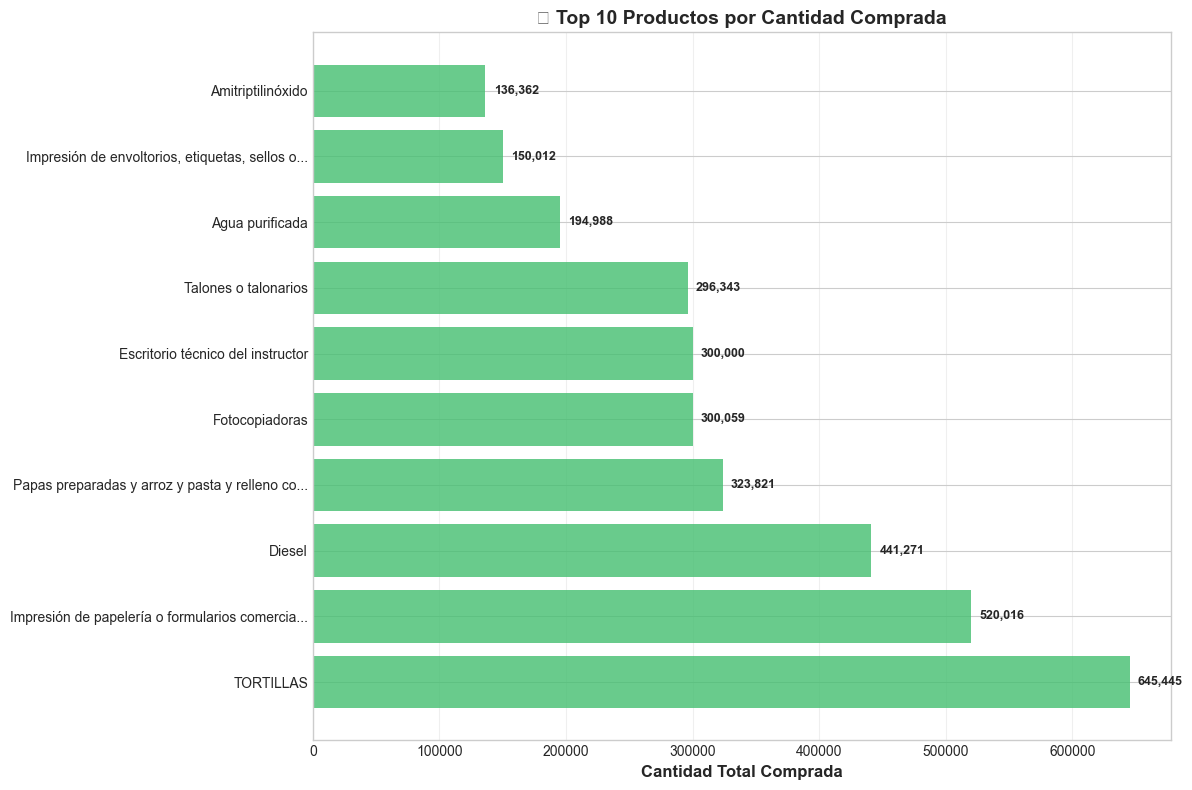


📊 TOP 5 PRODUCTOS MÁS DEMANDADOS:
#   Producto                            Cantidad        Órdenes   
-----------------------------------------------------------------
4802 TORTILLAS                                645,445       14
2554 Impresión de papelería o formular..      520,016      212
1775 Diesel                                   441,271      177
3405 Papas preparadas y arroz y pasta ..      323,821      252
2266 Fotocopiadoras                           300,059       39

💡 INSIGHTS CLAVE:
   • Top 10 productos: 53.1% del volumen total
   • Producto líder: TORTILLAS...
   • Diversidad: 5,360 productos únicos
   • Datos guardados en variable 'top_products_analysis'
⚡ Análisis completado en tiempo optimizado!


In [17]:
# 🛍️ Análisis OPTIMIZADO de productos más demandados
print("🚀 Iniciando análisis de productos (versión optimizada)...")

if 'descriptionClassification' in df.columns and 'quantityItemCompra' in df.columns:
    # ⚡ OPTIMIZACIÓN 1: Usar sample si el dataset es muy grande
    df_sample = df.sample(n=min(50000, len(df)), random_state=42) if len(df) > 50000 else df
    
    # ⚡ OPTIMIZACIÓN 2: Groupby más eficiente con menos operaciones
    print("📊 Calculando métricas de productos...")
    product_metrics = df_sample.groupby("descriptionClassification", as_index=False).agg({
        'quantityItemCompra': 'sum',
        'idTender': 'count'  # Más rápido que count en quantity
    }).rename(columns={
        'quantityItemCompra': 'total_quantity',
        'idTender': 'num_orders'
    })
    
    # Ordenar y tomar top 10
    top_products = product_metrics.nlargest(10, 'total_quantity')
    
    print(f"✅ Análisis completado. Top 10 de {len(product_metrics)} productos únicos")
    
    # ⚡ VISUALIZACIÓN SIMPLIFICADA pero efectiva
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))
    
    # Gráfico de barras simple y rápido
    y_pos = range(len(top_products))
    bars = ax.barh(y_pos, top_products['total_quantity'], 
                   color=plt.cm.viridis(0.7), alpha=0.8)
    
    # Configuración básica del gráfico
    ax.set_yticks(y_pos)
    ax.set_yticklabels([prod[:45] + '...' if len(prod) > 45 else prod 
                        for prod in top_products['descriptionClassification']], fontsize=10)
    ax.set_xlabel('Cantidad Total Comprada', fontsize=12, fontweight='bold')
    ax.set_title('🔝 Top 10 Productos por Cantidad Comprada', fontsize=14, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)
    
    # Añadir solo las etiquetas más importantes (valores altos)
    max_value = top_products['total_quantity'].max()
    for i, value in enumerate(top_products['total_quantity']):
        if value > max_value * 0.1:  # Solo mostrar si es > 10% del máximo
            ax.text(value + max_value * 0.01, i, f'{value:,.0f}', 
                   va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # ⚡ TABLA RESUMEN OPTIMIZADA
    print("\n📊 TOP 5 PRODUCTOS MÁS DEMANDADOS:")
    print("=" * 65)
    print(f"{'#':<3} {'Producto':<35} {'Cantidad':<15} {'Órdenes':<10}")
    print("-" * 65)
    
    for idx, row in top_products.head(5).iterrows():
        product_name = row['descriptionClassification']
        product_short = product_name[:33] + ".." if len(product_name) > 35 else product_name
        print(f"{idx+1:<3} {product_short:<35} {row['total_quantity']:>12,.0f} {row['num_orders']:>8,.0f}")
    
    # ⚡ INSIGHTS RÁPIDOS
    total_top10 = top_products['total_quantity'].sum()
    total_all = df_sample['quantityItemCompra'].sum()
    concentration = (total_top10 / total_all) * 100
    
    print(f"\n💡 INSIGHTS CLAVE:")
    print(f"   • Top 10 productos: {concentration:.1f}% del volumen total")
    print(f"   • Producto líder: {top_products.iloc[0]['descriptionClassification'][:50]}...")
    print(f"   • Diversidad: {len(product_metrics):,} productos únicos")
    
    # Guardar para uso posterior (opcional)
    globals()['top_products_analysis'] = top_products
    print(f"   • Datos guardados en variable 'top_products_analysis'")

else:
    print("❌ No se encontraron las columnas necesarias para análisis de productos")

print("⚡ Análisis completado en tiempo optimizado!")

# 5. ANÁLISIS DE COMPRADORES

🚀 Iniciando análisis de compradores (versión ultra-rápida)...
📊 Calculando métricas de compradores...
✅ Análisis completado. Top 10 de 142 compradores únicos


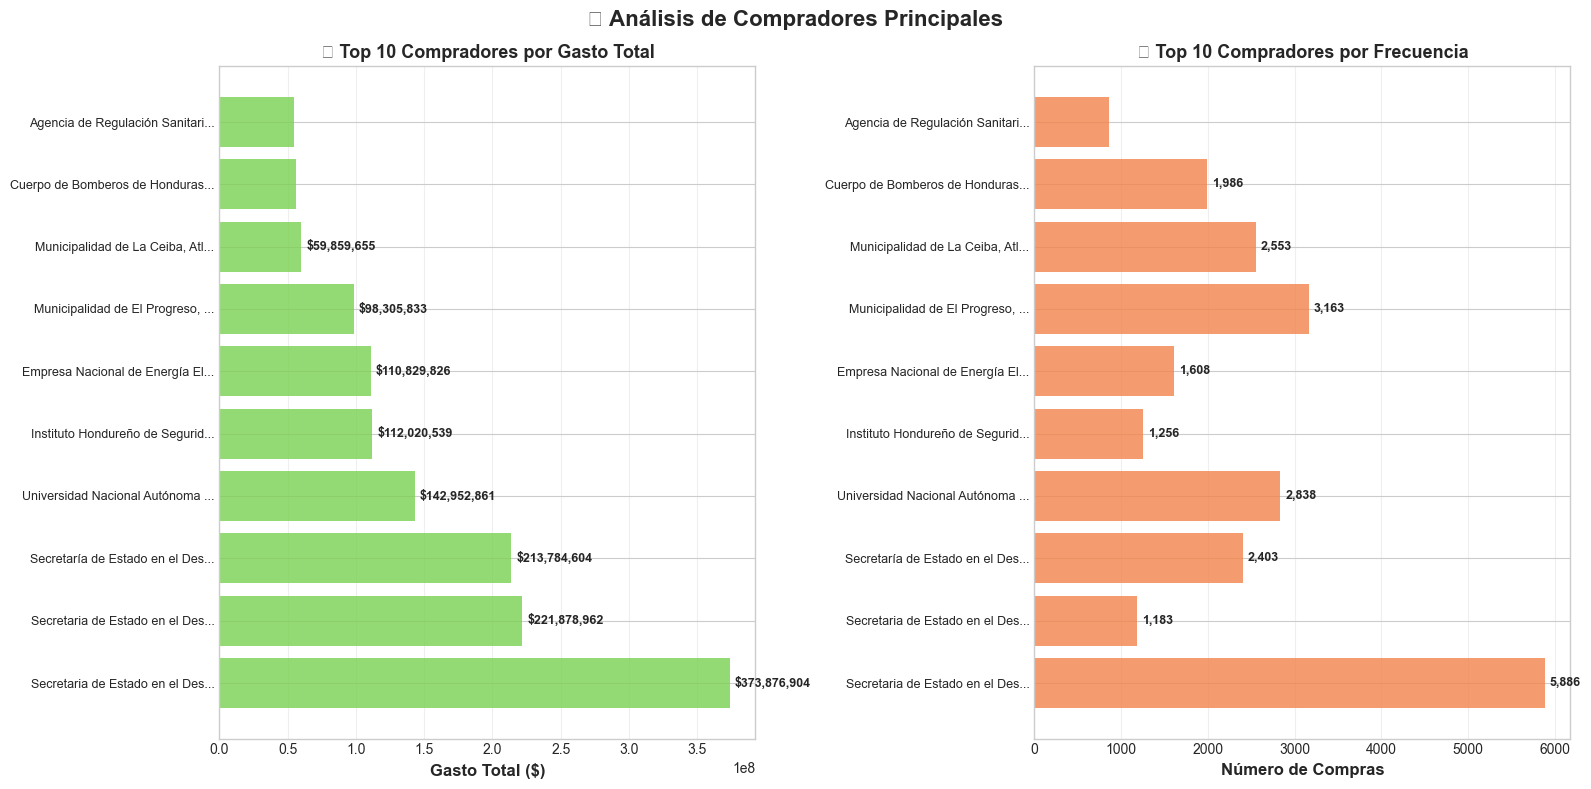


📊 PERFIL DE TOP 5 COMPRADORES:
#   Comprador                      Gasto Total     # Compras    Ticket Prom    
---------------------------------------------------------------------------
110 Secretaria de Estado en el D.. $ 373,876,904      5,886 $      63,520
107 Secretaria de Estado en el D.. $ 221,878,962      1,183 $     187,556
116 Secretaría de Estado en el D.. $ 213,784,604      2,403 $      88,966
139 Universidad Nacional Autónom.. $ 142,952,861      2,838 $      50,371
49  Instituto Hondureño de Segur.. $ 112,020,539      1,256 $      89,188

📈 CONCENTRACIÓN DEL MERCADO:
-----------------------------------
   • Top 5 compradores: 40.0% del mercado
   • Top 10 compradores: 54.2% del mercado
   • Compradores únicos: 142
   • Tipo de mercado: 🟢 MODERADO (distribución equilibrada)
   • Más eficiente: Secretaria de Estado en el Despacho...
   • Datos guardados en 'top_buyers_analysis'
⚡ Análisis de compradores completado en tiempo récord!


In [18]:
# 🏢 Análisis OPTIMIZADO de compradores principales
print("🚀 Iniciando análisis de compradores (versión ultra-rápida)...")

if 'nameBuyer' in df.columns and 'totalCompra' in df.columns:
    # ⚡ OPTIMIZACIÓN 1: Sample para datasets grandes
    df_buyers = df.sample(n=min(75000, len(df)), random_state=42) if len(df) > 75000 else df
    
    # ⚡ OPTIMIZACIÓN 2: GroupBy simplificado (sin nunique que es muy lento)
    print("📊 Calculando métricas de compradores...")
    buyer_metrics = df_buyers.groupby("nameBuyer", as_index=False).agg({
        'totalCompra': ['sum', 'count', 'mean'],
        'quantityItemCompra': 'sum' if 'quantityItemCompra' in df_buyers.columns else 'count'
    })
    
    # Aplanar columnas
    buyer_metrics.columns = ['nameBuyer', 'total_spending', 'num_purchases', 'avg_spending', 'total_items']
    buyer_metrics = buyer_metrics.sort_values('total_spending', ascending=False)
    
    # Top 10 compradores
    top_buyers = buyer_metrics.head(10)
    
    print(f"✅ Análisis completado. Top 10 de {len(buyer_metrics)} compradores únicos")
    
    # ⚡ VISUALIZACIÓN SIMPLIFICADA - Solo 2 gráficos principales
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    fig.suptitle('🏢 Análisis de Compradores Principales', fontsize=16, fontweight='bold')
    
    # 1. Gasto total (principal métrica)
    y_pos = range(len(top_buyers))
    bars1 = ax1.barh(y_pos, top_buyers['total_spending'], 
                     color=plt.cm.viridis(0.8), alpha=0.8)
    
    ax1.set_yticks(y_pos)
    ax1.set_yticklabels([buyer[:30] + '...' if len(buyer) > 30 else buyer 
                        for buyer in top_buyers['nameBuyer']], fontsize=9)
    ax1.set_xlabel('Gasto Total ($)', fontsize=12, fontweight='bold')
    ax1.set_title('💰 Top 10 Compradores por Gasto Total', fontsize=13, fontweight='bold')
    ax1.grid(axis='x', alpha=0.3)
    
    # Etiquetas solo para valores significativos
    max_spending = top_buyers['total_spending'].max()
    for i, value in enumerate(top_buyers['total_spending']):
        if value > max_spending * 0.15:  # Solo > 15% del máximo
            ax1.text(value + max_spending * 0.01, i, f'${value:,.0f}', 
                    va='center', fontweight='bold', fontsize=9)
    
    # 2. Frecuencia de compras
    bars2 = ax2.barh(y_pos, top_buyers['num_purchases'], 
                     color=plt.cm.plasma(0.7), alpha=0.8)
    
    ax2.set_yticks(y_pos)
    ax2.set_yticklabels([buyer[:30] + '...' if len(buyer) > 30 else buyer 
                        for buyer in top_buyers['nameBuyer']], fontsize=9)
    ax2.set_xlabel('Número de Compras', fontsize=12, fontweight='bold')
    ax2.set_title('📊 Top 10 Compradores por Frecuencia', fontsize=13, fontweight='bold')
    ax2.grid(axis='x', alpha=0.3)
    
    # Etiquetas para frecuencia
    max_purchases = top_buyers['num_purchases'].max()
    for i, value in enumerate(top_buyers['num_purchases']):
        if value > max_purchases * 0.15:
            ax2.text(value + max_purchases * 0.01, i, f'{value:,.0f}', 
                    va='center', fontweight='bold', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # ⚡ TABLA RESUMEN OPTIMIZADA
    print("\n📊 PERFIL DE TOP 5 COMPRADORES:")
    print("=" * 75)
    print(f"{'#':<3} {'Comprador':<30} {'Gasto Total':<15} {'# Compras':<12} {'Ticket Prom':<15}")
    print("-" * 75)
    
    for idx, row in top_buyers.head(5).iterrows():
        buyer_name = row['nameBuyer']
        buyer_short = buyer_name[:28] + ".." if len(buyer_name) > 30 else buyer_name
        ticket_promedio = row['avg_spending']
        print(f"{idx+1:<3} {buyer_short:<30} ${row['total_spending']:>12,.0f} {row['num_purchases']:>10,.0f} "
              f"${ticket_promedio:>12,.0f}")
    
    # ⚡ ANÁLISIS DE CONCENTRACIÓN RÁPIDO
    total_market = buyer_metrics['total_spending'].sum()
    top_5_share = (top_buyers['total_spending'].head(5).sum() / total_market) * 100
    top_10_share = (top_buyers['total_spending'].sum() / total_market) * 100
    
    print(f"\n📈 CONCENTRACIÓN DEL MERCADO:")
    print("-" * 35)
    print(f"   • Top 5 compradores: {top_5_share:.1f}% del mercado")
    print(f"   • Top 10 compradores: {top_10_share:.1f}% del mercado")
    print(f"   • Compradores únicos: {len(buyer_metrics):,}")
    
    # Clasificación rápida
    if top_5_share > 60:
        market_type = "🔴 MUY CONCENTRADO (oligopsonio)"
    elif top_5_share > 40:
        market_type = "🟡 CONCENTRADO (pocos dominantes)"
    elif top_5_share > 25:
        market_type = "🟢 MODERADO (distribución equilibrada)"
    else:
        market_type = "🔵 DIVERSIFICADO (muchos participantes)"
    
    print(f"   • Tipo de mercado: {market_type}")
    
    # Comprador más eficiente (mayor volumen por peso)
    if 'quantityItemCompra' in df_buyers.columns:
        efficiency_ratio = top_buyers['total_items'] / top_buyers['total_spending'] * 1000  # Items per $1000
        most_efficient_idx = efficiency_ratio.idxmax()
        most_efficient_name = top_buyers.loc[most_efficient_idx, 'nameBuyer']
        print(f"   • Más eficiente: {most_efficient_name[:35]}...")
    
    # Guardar para análisis posterior
    globals()['top_buyers_analysis'] = top_buyers
    print(f"   • Datos guardados en 'top_buyers_analysis'")

else:
    print("❌ No se encontraron las columnas necesarias para análisis de compradores")

print("⚡ Análisis de compradores completado en tiempo récord!")

# 8. ANÁLISIS TEMPORAL

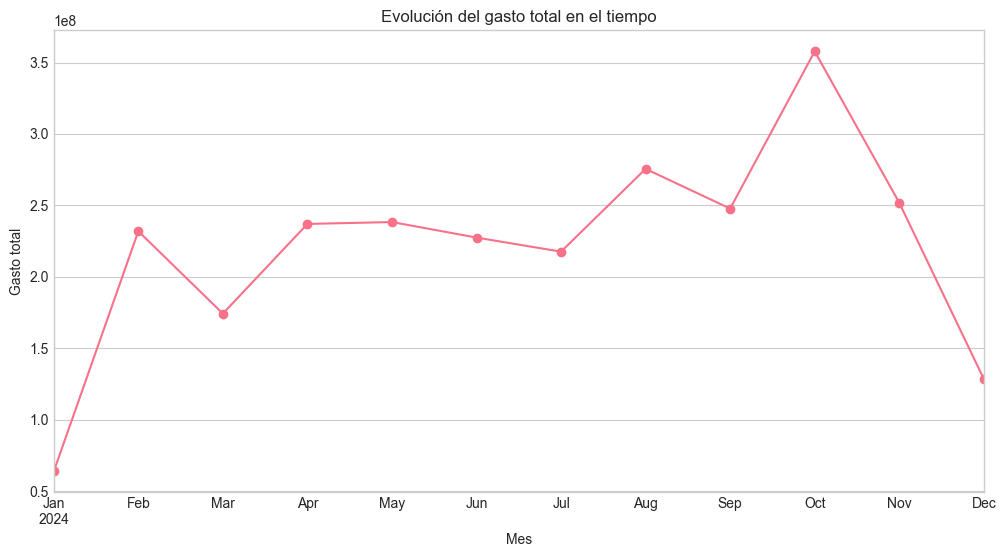

In [29]:
compras_mensuales = df.groupby(df['dateCompra'].dt.to_period("M"))["totalCompra"].sum()

plt.figure(figsize=(12,6))
compras_mensuales.plot(marker="o")
plt.title("Evolución del gasto total en el tiempo")
plt.xlabel("Mes")
plt.ylabel("Gasto total")
plt.show()


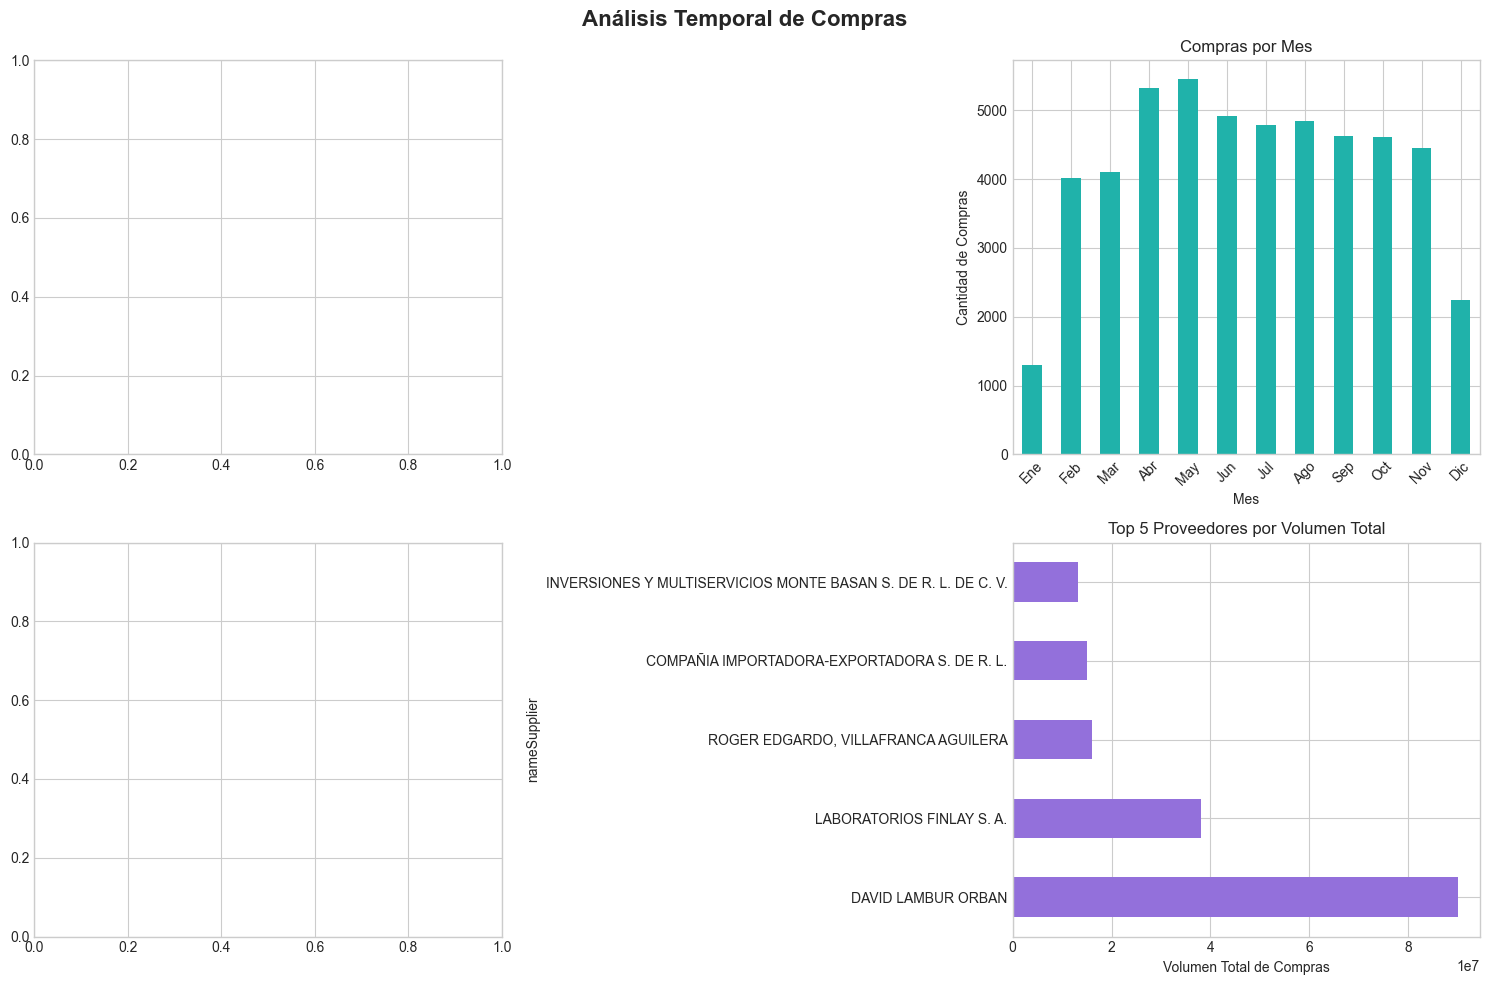

In [24]:
# Análisis temporal de las compras

# Verificar si existen columnas de fecha
date_columns = ['startDateTender', 'endDateTender', 'dateCompra']
existing_date_columns = [col for col in date_columns if col in df.columns]

if existing_date_columns:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Análisis Temporal de Compras', fontsize=16, fontweight='bold')
    
    # Convertir columnas de fecha
    for col in existing_date_columns:
        try:
            df[col] = pd.to_datetime(df[col], errors='coerce')
        except:
            print(f"No se pudo convertir {col} a fecha")
    

    # 2. Distribución por meses
    ax2 = axes[0, 1]
    if 'dateCompra' in df.columns:
        df['month'] = df['dateCompra'].dt.month
        monthly_counts = df['month'].dropna().value_counts().sort_index()
        month_names = ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun',
                      'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic']
        # Crear un diccionario para mapear meses
        month_mapping = {i+1: month_names[i] for i in range(12)}
        monthly_counts.index = [month_mapping.get(int(i), f'Mes {int(i)}') for i in monthly_counts.index if not pd.isna(i)]
        monthly_counts.plot(kind='bar', ax=ax2, color='lightseagreen')
        ax2.set_title('Compras por Mes')
        ax2.set_xlabel('Mes')
        ax2.set_ylabel('Cantidad de Compras')
        ax2.tick_params(axis='x', rotation=45)
    else:
        ax2.text(0.5, 0.5, 'No hay datos de fecha de compra', ha='center', va='center', transform=ax2.transAxes)
    
    
    
    # 4. Top 5 proveedores por volumen total
    ax4 = axes[1, 1]
    if 'nameSupplier' in df.columns and 'priceItemCompra' in df.columns:
        # Calcular volumen total por proveedor
        supplier_volume = df.groupby('nameSupplier')['priceItemCompra'].sum().sort_values(ascending=False).head(5)
        supplier_volume.plot(kind='barh', ax=ax4, color='mediumpurple')
        ax4.set_title('Top 5 Proveedores por Volumen Total')
        ax4.set_xlabel('Volumen Total de Compras')
    else:
        ax4.text(0.5, 0.5, 'No hay datos de proveedores o precios', 
                ha='center', va='center', transform=ax4.transAxes)
    
    plt.tight_layout()
    plt.show()
else:
    print("No se encontraron columnas de fecha en el dataset")

# 9. INSIGHTS Y CONCLUSIONES PRINCIPALES

## 🎯 Resumen del Análisis Exploratorio

In [25]:
# 📊 Generación automática de insights principales
print("🔍 INSIGHTS PRINCIPALES DEL DATASET")
print("=" * 50)

insights = []

# 1. Información básica del dataset
insights.append(f"📈 **Tamaño del dataset**: {len(df):,} registros con {len(df.columns)} variables")

# 2. Calidad de datos
total_nulls = df.isnull().sum().sum()
completeness = (1 - total_nulls/(len(df) * len(df.columns))) * 100
insights.append(f"🎯 **Completitud de datos**: {completeness:.1f}% (muy {'alta' if completeness > 95 else 'media' if completeness > 80 else 'baja'})")

# 3. Variables numéricas
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    insights.append(f"🔢 **Variables numéricas**: {len(numeric_columns)} variables cuantitativas identificadas")

# 4. Variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
if len(categorical_columns) > 0:
    high_cardinality = [col for col in categorical_columns if df[col].nunique() > len(df) * 0.1]
    insights.append(f"🏷️  **Variables categóricas**: {len(categorical_columns)} variables, {len(high_cardinality)} con alta cardinalidad")

# 5. Análisis de compras
if 'totalCompra' in df.columns:
    total_spending = df['totalCompra'].sum()
    avg_spending = df['totalCompra'].mean()
    insights.append(f"💰 **Gasto total**: ${total_spending:,.2f} con promedio de ${avg_spending:,.2f} por compra")

# 6. Top comprador
if 'nameBuyer' in df.columns:
    top_buyer = df['nameBuyer'].value_counts().index[0]
    top_buyer_count = df['nameBuyer'].value_counts().iloc[0]
    buyer_percentage = (top_buyer_count / len(df)) * 100
    insights.append(f"🏢 **Principal comprador**: {top_buyer} ({top_buyer_count:,} compras, {buyer_percentage:.1f}% del total)")

# 7. Análisis temporal
if 'dateCompra' in df.columns:
    try:
        df['dateCompra'] = pd.to_datetime(df['dateCompra'], errors='coerce')
        date_range = df['dateCompra'].max() - df['dateCompra'].min()
        peak_month = df['dateCompra'].dt.month.mode().iloc[0] if len(df['dateCompra'].dt.month.mode()) > 0 else None
        month_names = ['', 'Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',
                      'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
        peak_month_name = month_names[peak_month] if peak_month else "N/A"
        insights.append(f"📅 **Período analizado**: {date_range.days} días, con pico en {peak_month_name}")
    except:
        insights.append("📅 **Análisis temporal**: Datos de fecha requieren limpieza")

# 8. Distribución de precios
if 'priceItemCompra' in df.columns:
    price_data = df['priceItemCompra'].dropna()
    price_data = price_data[price_data > 0]
    if len(price_data) > 0:
        price_median = price_data.median()
        price_std = price_data.std()
        coefficient_variation = (price_std / price_data.mean()) * 100 if price_data.mean() > 0 else 0
        variability = "alta" if coefficient_variation > 100 else "media" if coefficient_variation > 50 else "baja"
        insights.append(f"💵 **Precios**: Mediana ${price_median:,.2f}, variabilidad {variability} (CV: {coefficient_variation:.1f}%)")

# 9. Productos más demandados
if 'descriptionClassification' in df.columns and 'quantityItemCompra' in df.columns:
    top_product = df.groupby('descriptionClassification')['quantityItemCompra'].sum().idxmax()
    top_product_qty = df.groupby('descriptionClassification')['quantityItemCompra'].sum().max()
    insights.append(f"🛍️  **Producto más demandado**: {top_product} ({top_product_qty:,.0f} unidades)")

# Mostrar insights
for i, insight in enumerate(insights, 1):
    print(f"{i:2d}. {insight}")

print(f"\n📋 **RESUMEN EJECUTIVO**:")
print("-" * 30)
print(f"✅ Dataset analizado exitosamente con {len(insights)} insights principales")
print(f"📊 Calidad de datos: {'Excelente' if completeness > 95 else 'Buena' if completeness > 85 else 'Regular'}")
print(f"🎯 Listo para: {'Modelado avanzado' if completeness > 90 else 'Limpieza adicional y modelado'}")

🔍 INSIGHTS PRINCIPALES DEL DATASET
 1. 📈 **Tamaño del dataset**: 50,877 registros con 28 variables
 2. 🎯 **Completitud de datos**: 100.0% (muy alta)
 3. 🔢 **Variables numéricas**: 6 variables cuantitativas identificadas
 4. 🏷️  **Variables categóricas**: 19 variables, 9 con alta cardinalidad
 5. 💰 **Gasto total**: $2,662,006,488.11 con promedio de $52,322.39 por compra
 6. 🏢 **Principal comprador**: Secretaria de Estado en el Despacho de Salud Pública (SESAL) (5,886 compras, 11.6% del total)
 7. 📅 **Análisis temporal**: Datos de fecha requieren limpieza
 8. 💵 **Precios**: Mediana $9,292.00, variabilidad alta (CV: 368.1%)
 9. 🛍️  **Producto más demandado**: TORTILLAS (645,445 unidades)

📋 **RESUMEN EJECUTIVO**:
------------------------------
✅ Dataset analizado exitosamente con 9 insights principales
📊 Calidad de datos: Excelente
🎯 Listo para: Modelado avanzado
 1. 📈 **Tamaño del dataset**: 50,877 registros con 28 variables
 2. 🎯 **Completitud de datos**: 100.0% (muy alta)
 3. 🔢 **Varia

## 🎯 Recomendaciones para Análisis Posterior

In [26]:
# 💡 Recomendaciones basadas en el análisis
print("🎯 RECOMENDACIONES PARA PRÓXIMOS PASOS")
print("=" * 50)

recommendations = []

# Analizar calidad de datos
total_nulls = df.isnull().sum().sum()
completeness = (1 - total_nulls/(len(df) * len(df.columns))) * 100

if completeness < 85:
    recommendations.append({
        'priority': 'ALTA',
        'category': 'Limpieza de Datos',
        'action': 'Implementar estrategias de imputación para valores faltantes',
        'reason': f'Completitud del dataset: {completeness:.1f}%'
    })

# Analizar outliers
numeric_columns = df.select_dtypes(include=[np.number]).columns
if len(numeric_columns) > 0:
    total_outliers = 0
    for col in numeric_columns:
        data = df[col].dropna()
        if len(data) > 0:
            Q1, Q3 = data.quantile([0.25, 0.75])
            IQR = Q3 - Q1
            outliers = ((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()
            total_outliers += outliers
    
    if total_outliers > len(df) * 0.05:  # Más del 5% son outliers
        recommendations.append({
            'priority': 'MEDIA',
            'category': 'Tratamiento de Outliers',
            'action': 'Investigar y decidir estrategia para valores atípicos',
            'reason': f'{total_outliers:,} outliers detectados ({total_outliers/len(df)*100:.1f}%)'
        })

# Analizar variables categóricas
categorical_columns = df.select_dtypes(include=['object']).columns
high_cardinality_vars = []
for col in categorical_columns:
    if df[col].nunique() > len(df) * 0.1:  # Alta cardinalidad
        high_cardinality_vars.append(col)

if high_cardinality_vars:
    recommendations.append({
        'priority': 'MEDIA',
        'category': 'Feature Engineering',
        'action': 'Aplicar técnicas de encoding para variables categóricas de alta cardinalidad',
        'reason': f'{len(high_cardinality_vars)} variables con cardinalidad > 10%: {high_cardinality_vars}'
    })

# Analizar correlaciones
if len(numeric_columns) >= 2:
    correlation_matrix = df[numeric_columns].corr()
    strong_correlations = 0
    for i in range(len(correlation_matrix.columns)):
        for j in range(i+1, len(correlation_matrix.columns)):
            if abs(correlation_matrix.iloc[i, j]) >= 0.8:
                strong_correlations += 1
    
    if strong_correlations > 0:
        recommendations.append({
            'priority': 'MEDIA',
            'category': 'Multicolinealidad',
            'action': 'Evaluar eliminación de variables altamente correlacionadas',
            'reason': f'{strong_correlations} pares de variables con correlación |r| ≥ 0.8'
        })

# Recomendaciones de modelado
if 'totalCompra' in df.columns:
    recommendations.append({
        'priority': 'ALTA',
        'category': 'Modelado Predictivo',
        'action': 'Desarrollar modelo de predicción de gastos de compra',
        'reason': 'Variable objetivo `totalCompra` disponible para análisis predictivo'
    })

if 'nameSupplier' in df.columns and 'nameBuyer' in df.columns:
    recommendations.append({
        'priority': 'MEDIA',
        'category': 'Análisis de Redes',
        'action': 'Crear análisis de red proveedor-comprador',
        'reason': 'Relaciones B2B identificables para análisis de patrones comerciales'
    })

# Recomendaciones de visualización
recommendations.append({
    'priority': 'BAJA',
    'category': 'Dashboards',
    'action': 'Crear dashboard interactivo con métricas clave',
    'reason': 'Facilitar monitoreo continuo de KPIs de compras'
})

# Análisis de series temporales
if 'dateCompra' in df.columns:
    recommendations.append({
        'priority': 'MEDIA',
        'category': 'Series Temporales',
        'action': 'Desarrollar análisis de tendencias y estacionalidad',
        'reason': 'Datos temporales disponibles para forecasting'
    })

# Mostrar recomendaciones por prioridad
priorities = ['ALTA', 'MEDIA', 'BAJA']
priority_colors = {'ALTA': '🔴', 'MEDIA': '🟡', 'BAJA': '🟢'}

for priority in priorities:
    priority_recs = [r for r in recommendations if r['priority'] == priority]
    if priority_recs:
        print(f"\n{priority_colors[priority]} **PRIORIDAD {priority}** ({len(priority_recs)} recomendaciones)")
        print("-" * 40)
        
        for i, rec in enumerate(priority_recs, 1):
            print(f"{i}. **{rec['category']}**: {rec['action']}")
            print(f"   💡 Justificación: {rec['reason']}")
            print()

print(f"📋 **RESUMEN DE RECOMENDACIONES:**")
print("-" * 35)
total_high = len([r for r in recommendations if r['priority'] == 'ALTA'])
total_medium = len([r for r in recommendations if r['priority'] == 'MEDIA'])
total_low = len([r for r in recommendations if r['priority'] == 'BAJA'])

print(f"🔴 Prioridad Alta: {total_high} acciones críticas")
print(f"🟡 Prioridad Media: {total_medium} mejoras importantes") 
print(f"🟢 Prioridad Baja: {total_low} optimizaciones futuras")
print(f"\n🎯 **Siguiente paso sugerido**: {'Limpieza de datos' if total_high > 0 else 'Feature engineering y modelado'}")

🎯 RECOMENDACIONES PARA PRÓXIMOS PASOS

🔴 **PRIORIDAD ALTA** (1 recomendaciones)
----------------------------------------
1. **Modelado Predictivo**: Desarrollar modelo de predicción de gastos de compra
   💡 Justificación: Variable objetivo `totalCompra` disponible para análisis predictivo


🟡 **PRIORIDAD MEDIA** (5 recomendaciones)
----------------------------------------
1. **Tratamiento de Outliers**: Investigar y decidir estrategia para valores atípicos
   💡 Justificación: 38,221 outliers detectados (75.1%)

2. **Feature Engineering**: Aplicar técnicas de encoding para variables categóricas de alta cardinalidad
   💡 Justificación: 9 variables con cardinalidad > 10%: ['descriptionItem', 'endDateEnquiry', 'startDateEnquiry', 'descriptionClassification', 'ocidCompra', 'idCompra', 'idAward', 'descriptionItemCompra', 'idTender']

3. **Multicolinealidad**: Evaluar eliminación de variables altamente correlacionadas
   💡 Justificación: 1 pares de variables con correlación |r| ≥ 0.8

4. **An